In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#load data
df = pd.read_csv('CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
#display the head
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#check for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

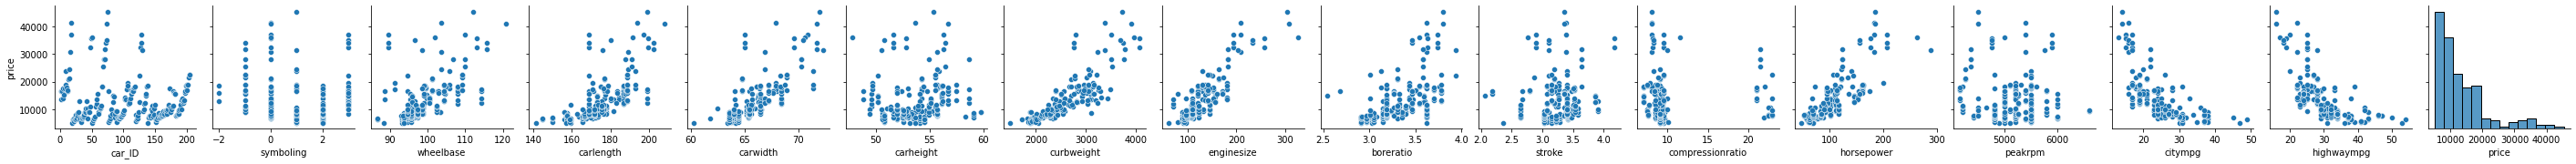

In [5]:
#quick EDA for cols related to target
sns.pairplot(df, y_vars='price');

In [6]:
#make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,...,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [7]:
#make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [8]:
#make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [9]:
#make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean')#,
                          #StandardScaler()
                          )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

In [10]:
#fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                        

In [12]:
#create the empty list
final_features = []

In [13]:
#use named steps dictionary to find the encoder
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [14]:
#get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x5', 'CarName_bmw z4', 'CarName_buick century',
       'CarName_buick century luxus (sw)',
       'CarName_buick century special', 'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skylark',
       'CarName_chevrolet impala', 'CarName_chevrolet monte carlo',
       'CarName_chevrolet vega 2300', 'CarName_dodge challenger se',
       'CarName_dodge colt (sw)', 'CarName_dodge coronet custom',
       'CarName_dodge coronet custom (sw)', 'CarName_dodge d200',
       'CarName_dodge rampage', 'CarName_honda accord',
       'CarName_honda accord cvcc', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1300',
       'CarName_honda civic 

In [15]:
#add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

In [16]:
#add the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

In [17]:
#creat dataframe with new column names
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0


In [18]:
#creat dataframe with new column names
X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)
X_test_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.2,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2420.0,108.0,3.62,2.64,9.0,82.0,4800.0,23.0,29.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,1945.0,91.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2324.0,120.0,3.33,3.47,8.5,97.0,5200.0,27.0,34.0


In [20]:
#add a constante and overwrite data
X_train_df = sm.add_constant(X_train_df, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_df, prepend=False, has_constant='add')
display(X_train_df.head(2), X_test_df.head(2))

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0,1.0


,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,1.0


In [21]:
#instantiate an OLS model WITH the training data
model = sm.OLS(y_train, X_train_df, hasconst=True)
#fit the model and save the result as new var
result = model.fit()

In [22]:
#get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     65.75
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.04e-06
Time:                        21:26:12   Log-Likelihood:                -1033.6
No. Observations:                 153   AIC:                             2359.
Df Residuals:                       7   BIC:                             2802.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_alfa-romero giulia               2286.4936   8760.511      0.261      0.802   -1.84e+04     2.3e+04
CarName_alfa-romero stelvio              5264.7981   8650.165      0.609      0.562   -1.52e+04    2.57e+04
CarName_audi 100 ls                      4928.7050    1.2e+04      0.412      0.692   -2.33e+04    3.32e+04
CarName_audi 100ls                      -5084.6923   8096.043     -0.628      0.550   -2.42e+04    1.41e+04
CarName_audi 5000                        1667.6325   5860.171      0.285      0.784   -1.22e+04    1.55e+04
CarName_audi 5000s (diesel)             -4157.3296   6780.267     -0.613      0.559   -2.02e+04    1.19e+04
CarName_audi fox                         1764.8563   5428.978      0.325      0.755   -1.11e+04    1.46e+04
CarName_bmw 320i                         8512.3034   1.02e+04      0.832      0.433   -1.57e+04    3.27e+04
CarName_bmw x1                           2.386e+04   1.13e+04      2.120      0.072   -2753.661    5.05e+04
CarName_bmw x3                           2.106e+04   1.12e+04      1.877      0.103   -5467.005    4.76e+04
CarName_bmw x5                           3.169e+04   1.08e+04      2.940      0.022    6199.159    5.72e+04
CarName_bmw z4                           2.023e+04   1.16e+04      1.742      0.125   -7236.067    4.77e+04
CarName_buick century                    5758.0684   4116.726      1.399      0.205   -3976.441    1.55e+04
CarName_buick century luxus (sw)         7162.0385   5235.846      1.368      0.214   -5218.770    1.95e+04
CarName_buick century special           -1088.7448   5445.733     -0.200      0.847    -1.4e+04    1.18e+04
CarName_buick opel isuzu deluxe         -5472.0827   3024.353     -1.809      0.113   -1.26e+04    1679.377
CarName_buick regal sport coupe (turbo)  7741.9828   3944.385      1.963      0.090   -1585.006    1.71e+04
CarName_buick skylark                   -4667.1102   3923.305     -1.190      0.273   -1.39e+04    4610.031
CarName_chevrolet impala                 3617.0054   3104.116      1.165      0.282   -3723.062     1.1e+04
CarName_chevrolet monte carlo            1184.3126   8382.999      0.141      0.892   -1.86e+04     2.1e+04
CarName_chevrolet vega 2300              -355.9108   8486.864     -0.042      0.968   -2.04e+04    1.97e+04
CarName_dodge challenger se              -651.3161   8499.245     -0.077      0.941   -2.07e+04    1.94e+04
CarName_dodge colt (sw)                 -3602.9419   8323.139     -0.433      0.678   -2.33e+04    1.61e+04
CarName_dodge coronet custom            -3541.0140   9082.507     -0.390      0.708    -2.5e+04    1.79e+04
CarName_dodge coronet custom (sw)       -2667.7868   3901.553     -0.684      0.516   -1.19e+04    6557.920
CarName_dodge d200                      -3051.4395   9364.8

In [23]:
#after fitting statsmodels, use the result variable with .predict()
test_preds = result.predict(X_test_df)

In [24]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [26]:
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

The testing r-square value is 0.24468636442921265 and the testing mean squared error is 57782182.345137015.
